In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import ast
import matplotlib.pylab as plt
from astropy.io import ascii
import math as mt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-bright')
%matplotlib inline
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import Data
from jetset.data_loader import ObsData
from jetset.plot_sedfit import PlotSED
from jetset.sed_shaper import  SEDShape
from jetset.jet_model import Jet
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED

<H3> Criação do Data Frame com o JETSET

In [2]:
d=np.genfromtxt('sed_data.csv', delimiter = ',', names =True, dtype = [float, float, float, float, float, float, bool, '|S12'])
d.shape
data=Data(n_rows=d.shape[0])
data.set_field('x',d['Frequency'])
data.set_field('dx',value = d['Nu_f'])
data.set_field('y',d['Flux'])
data.set_field('dy',value=d['Flux_err'])
data.set_field('T_start', value=d['T_start'])
data.set_field('T_stop', value=d['T_stop'])
data.set_field('UL', value=d['UL'])
data.set_field('data_set', value=d['data_set'])

data.set_meta_data('z',0.354)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','lin-lin')
data.set_meta_data('obj_name', 'J1644')
data.metadata

OrderedDict([('z', 0.354),
             ('UL_CL', 0.95),
             ('restframe', 'obs'),
             ('data_scale', 'lin-lin'),
             ('obj_name', 'J1644')])

In [3]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes12
771527540000000.0,0.0,6.3535088e-15,0.0,55648.5401,55650.5401,True,UVOT1
554001660000000.0,0.0,7.3140652e-14,0.0,55648.5401,55650.5401,True,UVOT1
689764760000000.0,0.0,7.0340531e-14,0.0,55648.5401,55650.5401,True,UVOT1
851441230000000.0,0.0,7.2537585e-15,0.0,55648.5401,55650.5401,True,UVOT1
1116919900000000.0,0.0,2.0886615e-14,0.0,55648.5401,55650.5401,True,UVOT1
1334902700000000.0,0.0,2.3556433e-14,0.0,55648.5401,55650.5401,True,UVOT1
1437370900000000.0,0.0,2.0815289e-14,0.0,55648.5401,55650.5401,True,UVOT1
467388700000000.0,0.0,1.4542264e-14,6.563026e-15,55649.45823,55649.45823,False,LOAO


In [6]:
#data.table['UL'][-1] = False

In [4]:
sed_data = ObsData(data_table = data)
#sed_data.filter_time( T_max=55653,  exclude=False)
sed_data.table

nu_data,dnu_data,nuFnu_data,dnuFnu_data,nu_data_log,dnu_data_log,nuFnu_data_log,dnuFnu_data_log,dnuFnu_facke,dnuFnu_facke_log,UL,zero_error,T_start,T_stop,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),Hz,Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,MJD,MJD,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,bytes12
771527540000000.0,0.0,6.3535088e-15,1.2707017600000002e-15,14.887351433000026,0.0,-14.196986364217018,0.08685889638065036,1.2707017600000002e-15,0.2,True,True,55648.5401,55650.5401,UVOT1
554001660000000.0,0.0,7.3140652e-14,1.4628130400000002e-14,14.743511066042077,0.0,-13.135841172535846,0.08685889638065038,1.4628130400000002e-14,0.2,True,True,55648.5401,55650.5401,UVOT1
689764760000000.0,0.0,7.0340531e-14,1.4068106200000002e-14,14.838701002544434,0.0,-13.152794357521785,0.08685889638065036,1.4068106200000002e-14,0.2,True,True,55648.5401,55650.5401,UVOT1
851441230000000.0,0.0,7.2537585e-15,1.4507516999999998e-15,14.93015467652933,0.0,-14.1394369075181,0.08685889638065035,1.4507516999999998e-15,0.2,True,True,55648.5401,55650.5401,UVOT1
1116919900000000.0,0.0,2.0886615e-14,4.177323e-15,15.048022028768836,0.0,-13.680131938475412,0.08685889638065035,4.177323e-15,0.2,True,True,55648.5401,55650.5401,UVOT1
1334902700000000.0,0.0,2.3556433e-14,4.711286600000001e-15,15.125449611473563,0.0,-13.62789047134242,0.08685889638065036,4.711286600000001e-15,0.2,True,True,55648.5401,55650.5401,UVOT1
1437370900000000.0,0.0,2.0815289e-14,4.1630578e-15,15.157568848189191,0.0,-13.681617554979752,0.08685889638065035,4.1630578e-15,0.2,True,True,55648.5401,55650.5401,UVOT1
467388700000000.0,0.0,1.4542264e-14,6.563026e-15,14.669678208298036,0.0,-13.837367975446348,0.196000153510318,2.9084528e-15,0.2,False,False,55649.45823,55649.45823,LOAO


__Intervalo de observação entre o Fermi-LAT e o VERITAS__.

In [5]:
fermi = 55649.0-55648.0 

veritas = 55651.43542- 55649.43542
print(veritas*24*60*60 - fermi*24*60*60 )

86400.0


__Distribuição espectral de energia do evento SW J1644+57__

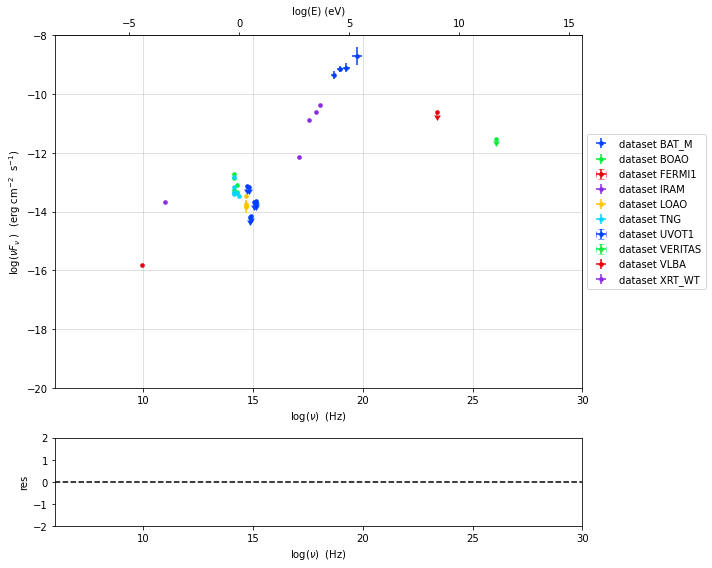

In [6]:
myPlot = sed_data.plot_sed(show_dataset=True)

#myPlot.save(filename='J1644_2.png')

__Adição de erros sistemáticos__

In [7]:
bin_data=sed_data.add_systematics(0.2,[10.**6,10.**29])

In [8]:
sed_data.filter_data_set(filters='UVOT1' ,exclude= True)

---> excluding  data_set/s ['UVOT1']
filter UVOT1 29
current datasets
dataset LOAO
dataset BOAO
dataset TNG
dataset BAT_M
dataset XRT_WT
dataset FERMI1
dataset VERITAS
dataset VLBA
dataset IRAM
---> data sets left after filtering None
---> data len after filtering=29


__Validação dos índices espectrais__


*** evaluating spectral indices for data ***



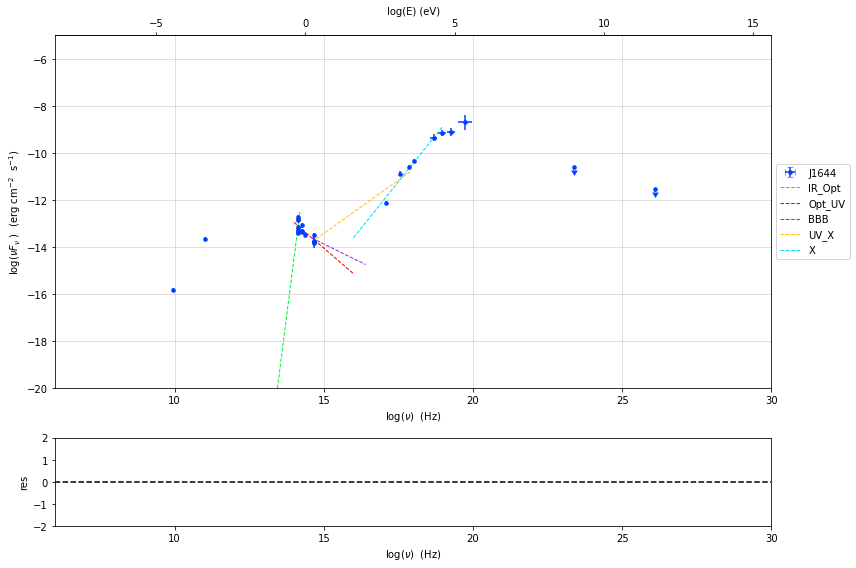

In [9]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(minimizer='minuit',silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-20,y_max=-5)

__Funções para salvar os arquivos__

In [10]:
def func_MMM(str_val, scss):
    p2.save("./Graphs_data/Composite_mod/pl/SSC_"+str_val+"_"+scss+"2.png")

        
def func_save_rep(str_val, scss):
    best_fit_minuit.save_report('./Graphs_data/Composite_mod/pl/SSC_Ob_Jet_'+str_val+'_'+ scss +'2.txt')
    model_minimizer_minuit.save_model('./Graphs_data/Composite_mod/pl/SSC_Ob_Jet_'+str_val+'_MMM_'+ scss +'2.pkl')
    composite_model.save_model('./Graphs_data/Composite_mod/pl/SSC_Ob_Jet_'+str_val+'_'+ scss +'2.pkl')

def func_save_MC_graph(str_val, scss):
    p.save("./Graphs_data/Composite_mod/pl/SSC_MC"+str_val+"_"+scss+"2.png")

def func_save_MC_pkl(str_val, scss):
    mcmc.save("./Graphs_data/Composite_mod/pl/SSC_MC"+str_val+"_"+scss+"2.pkl")    

def save_place_MC(str_val, scss):    
    func_save_MC(str_val, scss)


def save_place(str_val,  scss):
    func_save_rep(str_val, scss) 


__Modelagem matemática da emissão síncrotron a partir dos dados provenientes do Dataframe__


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [15, 25]
---> class:  HSP

---> class:  HSP


  model name      name      bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ------------ ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp            b -3.927650e-01 0.000000e+00    -- -3.927184e-01 -1.000000e+01  0.000000e+00  False
LogParabolaEp           Ep  1.996446e+01 0.000000e+00    --  1.996451e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp           Sp -8.798768e+00 0.000000e+00    -- -8.798972e+00 -3.000000e+01  0.000000e+00  False
  host_galaxy nuFnu_p_host -8.798972e+00 0.000000e+00    -- -8.798972e+00 -1.079897e+01 -6.798972e+00  False
  host_galaxy     nu_scale  0.000000e+00 0.000000e+00    --  0.000000e+00 -5.000000e-01  5.000000e-01  False
---> sync       nu_p=+1.996446e+01 (err=+0.000000e+00)  nuFnu_p=-8.798768e+00 (err=+0.000000

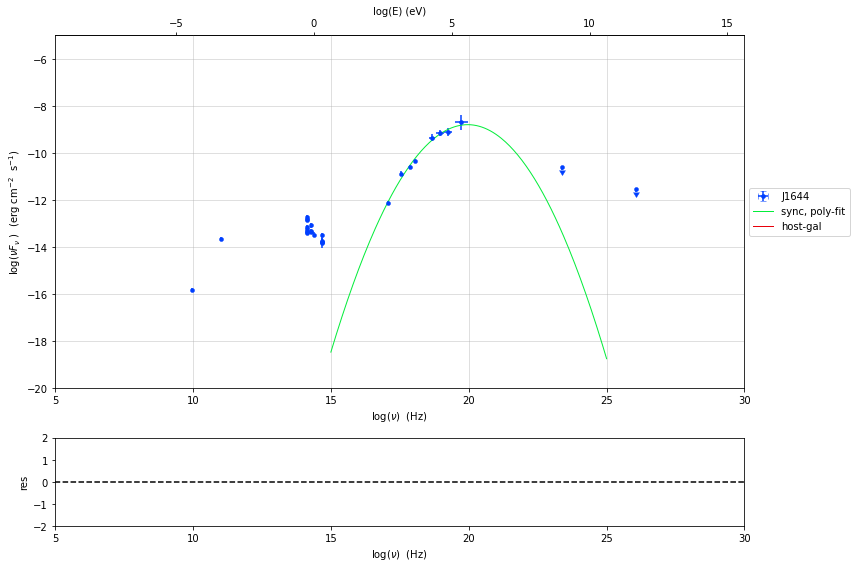

In [11]:
MM, best_fit = my_shape.sync_fit(check_host_gal_template = True,
                                use_log_par = True,
                                check_BBB_template=False,
                                check_disk = None,
                                Ep_start = 15,
                                minimizer = 'minuit',
                                silent = True,
                                fit_range = [15, 25])


p=my_shape.plot_shape_fit()
p.rescale(y_min=-20, y_max = -5,x_min=5,x_max=30)

In [13]:
best_fit.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str13,str12,float64,float64,float64,float64,float64,float64,bool
LogParabolaEp,b,-3.927650e-01,0.000000e+00,--,-3.927184e-01,-1.000000e+01,0.000000e+00,False
LogParabolaEp,Ep,1.996446e+01,0.000000e+00,--,1.996451e+01,0.000000e+00,3.000000e+01,False
LogParabolaEp,Sp,-8.798768e+00,0.000000e+00,--,-8.798972e+00,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-8.798972e+00,0.000000e+00,--,-8.798972e+00,-1.079897e+01,-6.798972e+00,False
host_galaxy,nu_scale,0.000000e+00,0.000000e+00,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


In [12]:
Host = my_shape.host_gal

__Modelagem matemática da emissão síncrotron a partir dos dados provenientes do Dataframe__


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22, 28]
---> LogParabola fit
| minim function calls=120, chisq=0.000000 UL part=-0.000000

  model name  name  bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp    b -1.000000e+00 0.000000e+00    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
LogParabolaEp   Ep  2.450000e+01 0.000000e+00    --  2.450000e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp   Sp -1.000000e+01 0.000000e+00    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> IC         nu_p=+2.450000e+01 (err=+0.000000e+00)  nuFnu_p=-1.000000e+01 (err=+0.000000e+00) curv.=-1.000000e+00 (err=+0.000000e+00)



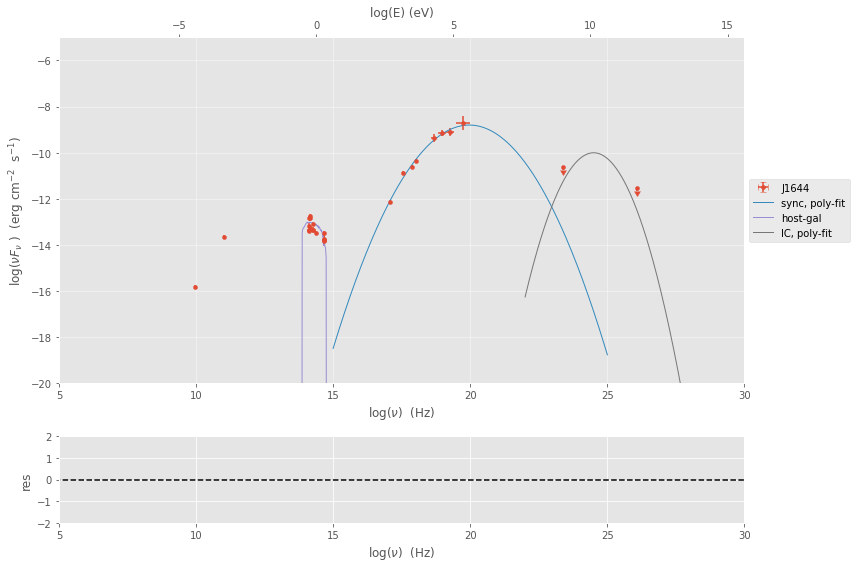

In [20]:
MM, best_fit = my_shape.IC_fit(fit_range=[22, 28],
                use_log_par= True,
                Ep_start=24.5,
                minimizer='minuit',
                silent=True)

p=my_shape.plot_shape_fit()
p.rescale(y_min=-20, y_max = -5, x_min=5,x_max=30)


# Delimitações observacionais de um modelo SSC 

In [15]:
from jetset.jet_model import Jet
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED




sed_obspar=ObsConstrain(B_range   = [1000,8000],
                        distr_e   = 'lpep',
                        R         = 3e+13,
                        nu_cut_IR = 1e+15,
                        SEDShape  = my_shape,
                        z         = 0.354,
                        t_var_sec = 86,
                        beaming   = 15.7)

str_val = sed_obspar.distr_e
sed_obspar.get_model_constraint(silent = True)


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.397761e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 8.393456e+05     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 8.745441e+01     0.000000e+00               -- False  False
               r  spectral_curvature                 1.963825e+00    -1.500000e+01     1.500000e+01 False  False
gammap_log_parab    turn-over-energy lorentz-factor* 2.822474e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 2.989511e+13     1.000000e+03     1.000000e+30 False  False
             R_H     region_position              cm 1.000000e+17     0.000000e+00              

None

In [16]:
jet_l1 = sed_obspar.constrain_SSC_model(electron_distribution_log_values = False, silent = True, name = "FlaringJet")
jet_l1.spectral_components.Sync.state='on'# Desativando parte self-absorved da emissão síncrotron.
scss = jet_l1.spectral_components.Sync.state
jet_l1.set_IC_nu_size(1000)
jet_l1.eval()


***  constrains parameters from observable ***

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.397761e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 8.393456e+05     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 8.745441e+01     0.000000e+00               -- False  False
               r  spectral_curvature                 1.963825e+00    -1.500000e+01     1.500000e+01 False  False
gammap_log_parab    turn-over-energy lorentz-factor* 2.822474e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 2.989511e+13     1.000000e+03     1.000000e+30 False  False
             R_H     region_position           

## Modelo composto de um Steady + Flaring Jet

In [17]:
composite_model=FitModel(nu_size=1001, name='SW_J1644_+57') 
#Flaring Jet
composite_model.add_component(jet_l1)
#Steady Jet
steady_jet=Jet(electron_distribution='pl',name='SteadyJet')
steady_jet.spectral_components.Sync.state='on' # Desativando parte self-absorved da emissão síncrotron.
steady_jet.spectral_components.SSC.state='off' # Desativando a emissão SSC Do steady_jet
steady_jet.set_IC_nu_size(1000)
composite_model.add_component(steady_jet)
#Host Galaxy
composite_model.add_component(my_shape.host_gal)
composite_model.show_model()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: SW_J1644_+57  
type: composite_model  
components models:
 -model name: FlaringJet model type: jet
 -model name: SteadyJet model type: jet
 -model name: host_galaxy model type: template

-------------------------------------------------------------------------------------------------------------------
individual component description


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: FlaringJet  

electrons distribution:
 type: lpep  
 gamma energy grid size:  1001
 gmin grid : 5.397761e+01
 gmax grid : 8.393456e+05


# Definindo o alcance e o valor dos parâmetros

In [31]:
#composite_model.FlaringJet.parameters.R.fit_range = [3e+13, 0.048e13]
#composite_model.FlaringJet.parameters.R_H.fit_range = [1e+12, 0.5e13]
composite_model.FlaringJet.parameters.gmin.fit_range = [400, 800]
composite_model.FlaringJet.parameters.gmax.fit_range = [2e4, 5e4]#4
composite_model.FlaringJet.parameters.gammap_log_parab.fit_range = [2e3, 9e3]
composite_model.FlaringJet.parameters.B.fit_range = [1e3, 9000]#9000
composite_model.FlaringJet.parameters.beam_obj.fit_range = [15, 21]
composite_model.FlaringJet.parameters.N.fit_range = [10, 200]
composite_model.FlaringJet.parameters.r.fit_range = [1, 3]


#composite_model.set_par(jet_l1, "R_H", val = 4e+23)
composite_model.set_par(jet_l1, "R", val = 3e+13)
composite_model.set_par(jet_l1, "gmin", val = 500)
composite_model.set_par(jet_l1, "gmax", val = 1e+05)
composite_model.set_par(jet_l1, "gammap_log_parab", val = 9e+03)
composite_model.set_par(jet_l1, "B", val = 3500)
composite_model.set_par(jet_l1, "beam_obj", val = 15.7) #20.4
composite_model.set_par(jet_l1, "N", val = 100)
composite_model.set_par(jet_l1, "r", val = 1.5)
composite_model.FlaringJet.eval()


composite_model.freeze(jet_l1, "gmin")
composite_model.free(jet_l1, "gmax")
composite_model.freeze(jet_l1, "gammap_log_parab")
composite_model.freeze(jet_l1, "beam_obj")
composite_model.freeze(jet_l1, "R")
composite_model.freeze(jet_l1, "R_H")
composite_model.freeze(jet_l1, "z_cosm")
composite_model.free(jet_l1, "N")
composite_model.free(jet_l1, "B")
composite_model.eval()

#HOST GALAXY PARAM

composite_model.host_galaxy.set_par("nuFnu_p_host", -13)
composite_model.host_galaxy.set_par( "nu_scale", -0.1)
composite_model.host_galaxy.parameters.nuFnu_p_host.fit_range = [-16, -12.5]
#composite_model.host_galaxy.parameters.nu_scale.fit_range = [-2, 2]

composite_model.freeze(Host, "nuFnu_p_host")
composite_model.freeze(Host, "nu_scale",)


composite_model.host_galaxy.eval()

#Steady Jet PARAM

composite_model.set_par(steady_jet, "R", val = 27e+15)
composite_model.set_par(steady_jet, "gmin", val = 40)
composite_model.set_par(steady_jet, "gmax", val = 400)
composite_model.set_par(steady_jet, "B", val = 2.1)
composite_model.set_par(steady_jet, "beam_obj", val = 26.3)
composite_model.set_par(steady_jet, "N", val = 1e-2)
composite_model.set_par(steady_jet, "p", val =0.5)
composite_model.SteadyJet.eval()

composite_model.SteadyJet.parameters.p.fit_range = [0.5, 3.2]
composite_model.SteadyJet.parameters.gmin.fit_range = [1e1, 100]
composite_model.SteadyJet.parameters.gmax.fit_range = [1e2, 5e2]
composite_model.SteadyJet.parameters.beam_obj.fit_range = [20, 30]
composite_model.SteadyJet.parameters.B.fit_range = [1, 1e1]
composite_model.SteadyJet.parameters.N.fit_range = [1e-2, 10]
composite_model.SteadyJet.eval()


composite_model.freeze(steady_jet, "R_H")
composite_model.freeze(steady_jet, "R")
composite_model.freeze(steady_jet, "z_cosm")
composite_model.free(steady_jet, "N")
composite_model.free(steady_jet, "B")
composite_model.free(steady_jet, "p")


composite_model.FlaringJet.eval()
composite_model.SteadyJet.eval()
composite_model.eval()

## Observação do pré modelo

In [62]:
import matplotlib as mpl
mpl.style.use(['ggplot'])
%matplotlib inline
#composite_model.set_nu_grid(5e5,2e30, 2000)

#composite_model.eval()
#    composite_modelp2=composite_model.plot_model(sed_data=sed_data)

p2.rescale(y_min=-20,y_max= -5,x_min=5,x_max=30)
p2.rescale_res(y_min=-20,y_max= +20,x_min=5,x_max=30)
p2.save("mmq_init_l.png")

# Electron distribution Functions 

This forms is used to input parameters concerning the emitting electron distribution. Before describing the various options, we give a caveat on the normalization of the electron energy distribution function. The analytical law f(γ), expressing the differential electron distribution function, is defined over the energy interval [γmin, γmax], and is normalized to unity through the constant K:


$ 1=\int_{\gamma_{min}}^{\gamma_{max}}Kf(\gamma)d\gamma $

in this way, by defining the differential electron distribution function n(γ) as:


$ n(\gamma)= N K f(\gamma) $

the numerical value N will provide, by definition, the number of emitting particles per unit volume expressed in $#/cm3$:

$ \int_{\gamma_{min}}^{\gamma_{max}}n(\gamma)d\gamma= \int_{\gamma_{min}}^{\gamma_{max}}Kf(\gamma)d\gamma=N $

The values of N, γmin, andγmax can be inserted in the corresponding form of the $ n(γ) $ menu. The available spectral laws for $ n(γ)$ , selectable through the drop-down menu "elec distr", are:


## 1)  Lei de Potência:

$$ f(\gamma) = \gamma^{-p} $$

- _p = Índice espectral_

## 5) log-par Ep:


$$ f(\gamma)=10^{-(r\log(\gamma/\gamma_p)^2)} $$



- $ γp $= _Energia na qual a lei de potência se transforma em uma log-par_
- r = _Curvatura espectral_


### Referencia:

 - http://isdc.unige.ch/sedtool/PROD/html_js/SED_Web_tool/Doc/test_doc/index.html#L4063

# Modelagem da composição de jatos através do MMQ


In [33]:
from jetset.minimizer import fit_SED,ModelMinimizer
########Minuit minimizer##########
model_minimizer_minuit = ModelMinimizer('minuit')
best_fit_minuit = model_minimizer_minuit.fit(composite_model,sed_data,
                                           1e5,
                                           4e30,
                                           fitname = str_val +" model J1644 " + scss,
                                           repeat = 3,
                                           use_UL = True,
                                            silent=False)


filtering data in fit range = [1.000000e+05,4.000000e+30]
data length 29

*** start fit process ***
----- 
fit run: 0
/ minim function calls=1580, chisq=252.938953 UL part=-0.000000
fit run: 1
| minim function calls=550, chisq=252.938399 UL part=-0.000000
fit run: 2
- minim function calls=220, chisq=252.938050 UL part=-0.000000
**************************************************************************************************
Fit report

Model: lpep model J1644 on
 model name       name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
----------- ---------------- ------------------- --------------- ------------- ---------------- ---------------- ----- ------
 FlaringJet             gmin  low-energy-cut-off lorentz-factor*  5.000000e+02     1.000000e+00     1.000000e+09 False   True
 FlaringJet             gmax high-energy-cut-off lorentz-factor*  4.999922e+04     1.000000e+00     1.000000e+15 False  False
 FlaringJet                N

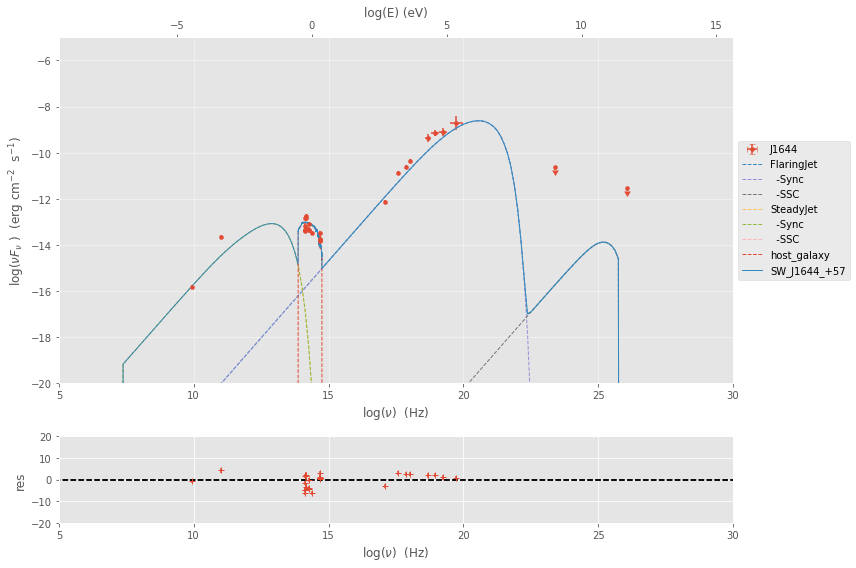

In [60]:
#jet_l1.save_model('SSC_Ob_Jet_lppl.dat')

%matplotlib inline
composite_model.set_nu_grid(1E5,1E30,10000)
composite_model.eval()


p3=composite_model.plot_model(sed_data=sed_data)
p3.rescale(y_min=-20,y_max= -5,x_min=5,x_max=30)
p3.rescale_res(y_min=-20,y_max= +20,x_min=5,x_max=30)
p3.save("MMQ_posmod.png")

In [61]:
model_minimizer_minuit.minimizer.mesg

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 252.9                      │        Nfcn = 220 (220 total)        │
│ EDM = 5.91e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │49.999216e3│0.000012e3 │            │            │  20000  │  50000  │       │
│ 1 │ par_1 │    16     │     4     │            │            │   10    │   200   │       │
│ 2 │ par_2 │    2.2    │    1.0    │            │            │    1    │    3    │       │
│ 3 │ par_3 │   9.0e3   │   1.6e3   │            │            │  1000   │  9000   │       │
│ 4 │ par_4 │ 39.80208  │  0.00024  │            │            │   10    │   100   │       │
│ 5 │ par_5 │  0.42e3   │  0.10e3   │            │            │   100   │   500   │       │
│ 6 │ par_6 │   0.010   │   0.011   │            │            │  0.01   │   10    │       │
│ 7 │ par_7 │    0.5    │    1.7    │            │            │   0.5   │   3.2   │       │
│ 8 │ par_8 │     1     │     7     │            │            │    1    │   10    │       │
│ 9 │ par_9 │    20     │     9     │            │            │   20    │   30    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [36]:
best_fit_minuit.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str11,str16,float64,float64,float64,float64,float64,float64,bool
FlaringJet,gmin,--,--,--,5.000000e+02,4.000000e+02,8.000000e+02,True
FlaringJet,gmax,4.999922e+04,1.147798e-02,--,1.000000e+05,2.000000e+04,5.000000e+04,False
FlaringJet,N,1.642333e+01,3.646083e+00,--,1.000000e+02,1.000000e+01,2.000000e+02,False
FlaringJet,r,2.243278e+00,1.051538e+00,--,1.500000e+00,1.000000e+00,3.000000e+00,False
FlaringJet,gammap_log_parab,--,--,--,9.000000e+03,2.000000e+03,9.000000e+03,True
FlaringJet,R,--,--,--,3.000000e+13,1.000000e+03,1.000000e+30,True
FlaringJet,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
FlaringJet,B,9.000000e+03,1.612244e+03,--,3.500000e+03,1.000000e+03,9.000000e+03,False
FlaringJet,beam_obj,--,--,--,1.570000e+01,1.500000e+01,2.100000e+01,True


## Fixando os parâmetros do jato Steady

In [37]:
composite_model.SteadyJet.parameters.gmin.frozen= True
composite_model.SteadyJet.parameters.gmax.frozen = True
composite_model.SteadyJet.parameters.N.frozen = True
composite_model.SteadyJet.parameters.p.frozen = True
composite_model.SteadyJet.parameters.B.frozen  = True
composite_model.SteadyJet.parameters.beam_obj.frozen = True

composite_model.SteadyJet.eval()
#composite_model.FlaringJet.eval()
composite_model.show_model()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: SW_J1644_+57  
type: composite_model  
components models:
 -model name: FlaringJet model type: jet
 -model name: SteadyJet model type: jet
 -model name: host_galaxy model type: template

-------------------------------------------------------------------------------------------------------------------
individual component description


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: FlaringJet  

electrons distribution:
 type: lpep  
 gamma energy grid size:  1001
 gmin grid : 5.000000e+02
 gmax grid : 4.999922e+04


best_fit_minuit.bestfit_table

In [38]:
params = []
for i in best_fit_minuit.parameters.par_array:
    params.append(i)

In [39]:
params = []
for i in best_fit_minuit.parameters.par_array:
    params.append(i)

params[0].name
params[0].frozen
labels_list = []
for j in range(len(params)):
    bool_test = (params[j].frozen == False)
    if bool_test:
        labels_list.append(params[j].name)
print(labels_list)

['gmax', 'N', 'r', 'B']


# Modelagem da composição de jatos através do MCCM

In [40]:
from jetset.mcmc import McmcSampler as MCMC
from jetset.minimizer import ModelMinimizer as MM

In [ ]:
save_place(str_val+"_fit_", scss)

In [41]:
#model_minimizer_minuit = ModelMinimizer.load_model('./Graphs_data/Composite_mod/pl/SSC_Ob_Jet_'+str_val+'_fit_'+'_MMM_'+ scss +'2.pkl')

mcmc=MCMC(model_minimizer_minuit)


#model_name = ["host_galaxy", "J1644" ]
labels_dict ={"FlaringJet": labels_list}

mcmc.run_sampler(nwalkers=256, burnin = 20,
                 steps = 50, bound = 0.2, 
                 bound_rel = False, threads = 4,
                 walker_start_bound = 0.02,
                 use_UL = True, use_labels_dict=labels_dict)


100%|██████████| 50/50 [00:00<00:00, 392.75it/s]

mcmc run starting

mcmc run done, with 1 threads took 0.14 seconds


In [64]:
mcmc.save("mcmc_true_free.pkl")

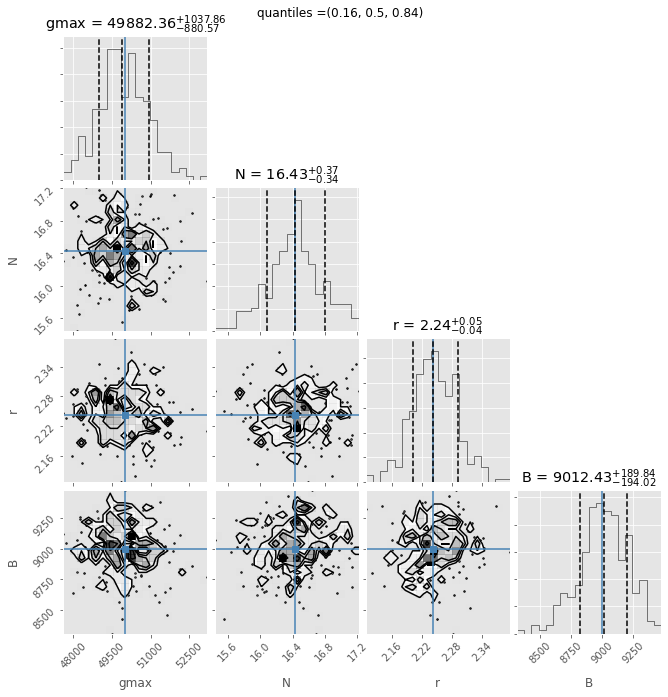

In [45]:
f = mcmc.corner_plot()

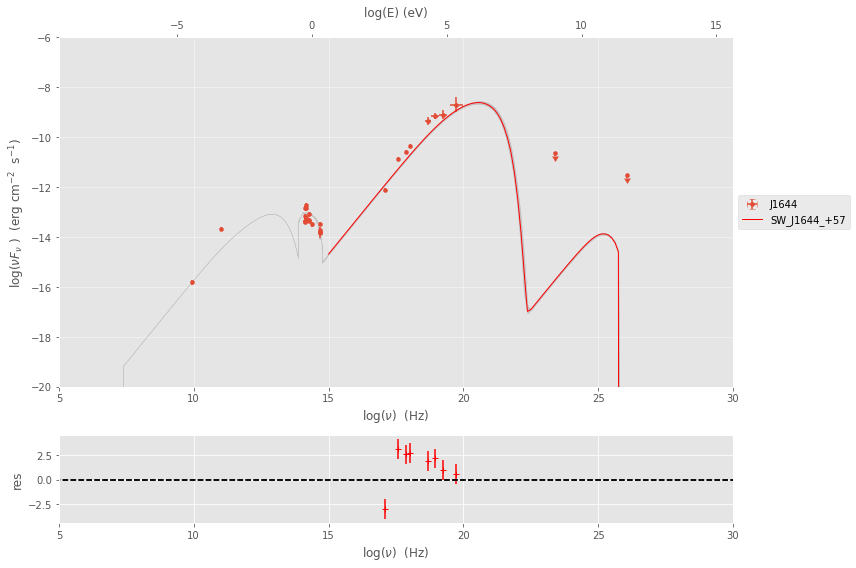

In [44]:
p_c = mcmc.plot_model(sed_data = sed_data, fit_range=[15., 30], size=50)
p_c.rescale(y_min = -20, y_max= -6, x_min = 5, x_max = 30)
p_c.save("mcmc_close.png")

## Curvas de Sensitividade CTA

In [57]:
from scipy import constants

planck = constants.physical_constants["Planck constant in eV s"][0]



#########################NORTH#################

################50 HORAS#####################
cta_n = pd.read_csv("North_50.csv", sep=";", names =["Energy(TeV)", "Flux"])

cta_n = cta_n.apply(lambda x: x.str.replace(",", "."))
cta_n.apply(pd.to_numeric)

cta_n = cta_n.astype('float64', copy=False)

cta_n["Energy(TeV)"] = cta_n['Energy(TeV)']*1e12/planck
cta_n.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)

cta_n["Energy(eV)"] = np.log10(cta_n['Energy(eV)'])
cta_n.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)

cta_n["Flux"] = np.log10(cta_n['Flux'])
cta_n.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_n = cta_n['log(E)(eV)'].to_list()

flux_list_n = cta_n["log(flux)"].to_list()

################ 0.5 HORAS#####################
cta_n_05 = pd.read_csv("0.5H_north.csv", sep=" . ", names =["Energy(TeV)", "Flux"])

cta_n_05 = cta_n_05.apply(lambda x: x.str.replace(",", "."))
cta_n_05.apply(pd.to_numeric)

cta_n_05 = cta_n_05.astype('float64', copy=False)

cta_n_05["Energy(TeV)"] = cta_n_05['Energy(TeV)']*1e12/planck
cta_n_05.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)

cta_n_05["Energy(eV)"] = np.log10(cta_n_05['Energy(eV)'])
cta_n_05.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)

cta_n_05["Flux"] = np.log10(cta_n_05['Flux'])
cta_n_05.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_n_05 = cta_n_05['log(E)(eV)'].to_list()

flux_list_n_05 = cta_n_05["log(flux)"].to_list()

################5 HORAS#####################
cta_n_5 = pd.read_csv("5h_north.csv", sep=" . ", names =["Energy(TeV)", "Flux"])

cta_n_5 = cta_n_5.apply(lambda x: x.str.replace(",", "."))
cta_n_5.apply(pd.to_numeric)

cta_n_5 = cta_n_5.astype('float64', copy=False)
cta_n_5["Energy(TeV)"] = cta_n_5['Energy(TeV)']*1e12/planck
cta_n_5.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)
cta_n_5["Energy(eV)"] = np.log10(cta_n_5['Energy(eV)'])
cta_n_5.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)
cta_n_5["Flux"] = np.log10(cta_n_5['Flux'])
cta_n_5.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_n_5 = cta_n_5['log(E)(eV)'].to_list()

flux_list_n_5 = cta_n_5["log(flux)"].to_list()

#########################SOUTH#########################

################50 HORAS#####################

cta_s = pd.read_csv("SOUTH_50.csv", sep=" . ", names =["Energy(TeV)", "Flux"])

cta_s = cta_s.apply(lambda x: x.str.replace(",", "."))
cta_s.apply(pd.to_numeric)

cta_s = cta_s.astype('float64', copy=False)

cta_s["Energy(TeV)"] = cta_s['Energy(TeV)']*1e12/planck
cta_s.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)

cta_s["Energy(eV)"] = np.log10(cta_s['Energy(eV)'])
cta_s.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)

cta_s["Flux"] = np.log10(cta_s['Flux'])
cta_s.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_s = cta_s['log(E)(eV)'].to_list()

flux_list_s = cta_s["log(flux)"].to_list()

################ 0.5 HORAS#####################

cta_s_05 = pd.read_csv("05hsouth.csv", sep=" . ", names =["Energy(TeV)", "Flux"])

cta_s_05 = cta_s_05.apply(lambda x: x.str.replace(",", "."))
cta_s_05.apply(pd.to_numeric)

cta_s_05 = cta_s_05.astype('float64', copy=False)

cta_s_05["Energy(TeV)"] = cta_s_05['Energy(TeV)']*1e12/planck
cta_s_05.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)

cta_s_05["Energy(eV)"] = np.log10(cta_s_05['Energy(eV)'])
cta_s_05.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)

cta_s_05["Flux"] = np.log10(cta_s_05['Flux'])
cta_s_05.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_s_05 = cta_s_05['log(E)(eV)'].to_list()

flux_list_s_05 = cta_s_05["log(flux)"].to_list()

################5 HORAS#####################
cta_s_5 = pd.read_csv("5hsouth.csv", sep=" . ", names =["Energy(TeV)", "Flux"])

cta_s_5 = cta_s_5.apply(lambda x: x.str.replace(",", "."))
cta_s_5.apply(pd.to_numeric)

cta_s_5 = cta_s_5.astype('float64', copy=False)
cta_s_5["Energy(TeV)"] = cta_s_5['Energy(TeV)']*1e12/planck
cta_s_5.rename({"Energy(TeV)":"Energy(eV)"}, inplace = True, axis = 1)
cta_s_5["Energy(eV)"] = np.log10(cta_s_5['Energy(eV)'])
cta_s_5.rename({"Energy(eV)":"log(E)(eV)"}, inplace = True, axis = 1)
cta_s_5["Flux"] = np.log10(cta_s_5['Flux'])
cta_s_5.rename({"Flux":"log(flux)"}, inplace = True, axis = 1)

energy_list_s_5 = cta_s_5['log(E)(eV)'].to_list()

flux_list_s_5 = cta_s_5["log(flux)"].to_list()


In [124]:
composite_model.set_par(jet_l1, "gammap_log_parab", val = 9e3)
composite_model.Jato_Intenso.eval()
composite_model.eval()

In [47]:
composite_model.show_model()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: SW_J1644_+57  
type: composite_model  
components models:
 -model name: FlaringJet model type: jet
 -model name: SteadyJet model type: jet
 -model name: host_galaxy model type: template

-------------------------------------------------------------------------------------------------------------------
individual component description


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: FlaringJet  

electrons distribution:
 type: lpep  
 gamma energy grid size:  1001
 gmin grid : 5.000000e+02
 gmax grid : 5.062570e+04


.
..
...
....
.....
......
.......
........
.........
..........
...........
............
.............
..............
...............
................
.................
..................
...................
....................
.....................
......................
.......................
........................
.........................
..........................
...........................
............................
.............................
..............................
...............................
................................
.................................
..................................
...................................
....................................
36
N =  [  5.          21.11111111  37.22222222  53.33333333  69.44444444
  85.55555556 101.66666667 117.77777778 133.88888889 150.        ] 
 B =  [ 5500.  9250. 13000.] 
 r =  [1.5 3.5] 
 Doppler =  [15.7, 18.0, 20.4] 
 Peak =  [ 5000. 80000.] 



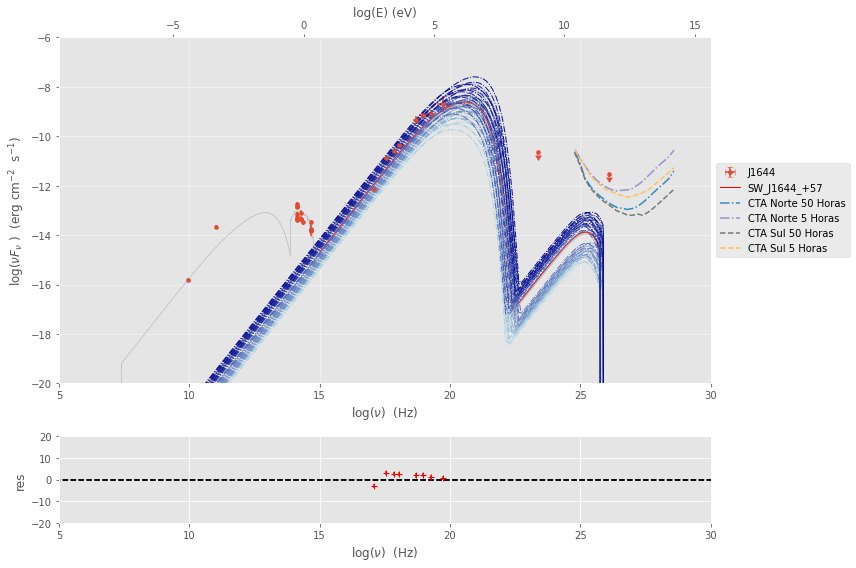

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='lightblue' #blue
c2='darkblue' #green
n=36
colors = []
for x in range(n+1):
    colors.append(colorFader(c1,c2,x/n)) 


p = mcmc.plot_model(sed_data = sed_data, fit_range=[15., 30], size=600, frame="obs")
N_lista = np.linspace(5, 150, num = 10)
B_lista = np.linspace(5500, 13000, num = 3)
r_lista = np.linspace(1.5, 3.5, num = 2)
#dop_lista = np.linspace(15.7, 20.4, num=3)
dop_lista = [15.7, 18.0, 20.4]
gamma_lista = np.linspace(5e3, 8e4, num = 2)
ls = ['-.', '--']

p.add_xy_plot(x = energy_list_n, y = flux_list_n, label = 'CTA Norte 50 Horas', line_style="-.", color = '#8baed4')
p.add_xy_plot(x = energy_list_n_5, y = flux_list_n_5, label = 'CTA Norte 5 Horas',  line_style="-.", color= '#8baed4')

p.add_xy_plot(x = energy_list_s, y = flux_list_s, label = 'CTA Sul 50 Horas', line_style="--", color = '#00008b')
p.add_xy_plot(x = energy_list_s_5, y = flux_list_s_5, label = 'CTA Sul 5 Horas',  line_style="--", color = '#00008b')
i = 0
n_init = composite_model.FlaringJet.parameters.N.val
b_init = composite_model.FlaringJet.parameters.B.val
r_init = composite_model.FlaringJet.parameters.r.val
d_init = composite_model.FlaringJet.parameters.beam_obj.val
dot = "."
for N, line in zip(N_lista, ls):
    #composite_model.Flaring.parameters.N.set_par = value
    composite_model.set_par(jet_l1, "N", val = N)
    composite_model.FlaringJet.eval()
    composite_model.eval()
    for B in B_lista:
            composite_model.set_par(jet_l1, "B", val = B)
            composite_model.FlaringJet.eval()
            composite_model.eval()
            for d in dop_lista:
                composite_model.set_par(jet_l1,"beam_obj", val = d)
                composite_model.FlaringJet.eval()
                composite_model.eval()

                for r in r_lista:
                    composite_model.set_par(jet_l1, "r", val = r)
                    composite_model.FlaringJet.eval()
                    composite_model.eval()           #label="N = "+ str(N)+ ";  B = "+ str(B)+ "; r = "+ str(r)+ "; Doppler = "+str(d)
                    p.add_model_plot(model = jet_l1, color=colors[i],# label="N = "+ str(N)+ ";  B = "+ str(B)+ "; Doppler = "+str(d),#+ "; r = "+ str(r), 
                                  line_style='-.', flim=None, auto_label=False, fit_range=None)
                    i += 1
                    print(dot*i)
                    #for gamma in gamma_lista:
                    #    composite_model.set_par(jet_l1, "gammap_log_parab", val = gamma)
                    #    composite_model.Jato_Intenso.eval()
                    #    composite_model.eval()
                        
                        

composite_model.set_par(jet_l1, "N", val = n_init)
composite_model.set_par(jet_l1, "B", val = b_init)
composite_model.set_par(jet_l1,"beam_obj", val = d_init)
composite_model.set_par(jet_l1, "r", val = r_init)
composite_model.FlaringJet.eval()
composite_model.eval()
                        
print(i)
print("N = ", N_lista, "\n", "B = ", B_lista, "\n", "r = ", r_lista, "\n", "Doppler = ", dop_lista, "\n", "Peak = ", gamma_lista, "\n")
p.rescale(y_min = -20, y_max= -6, x_min = 5, x_max = 30)
p.rescale_res(y_min = -20, y_max= +20, x_min = 5, x_max = 30)
p.save("expanded_model_cta.png")